In [66]:
import faiss
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np

In [67]:
text_index = faiss.read_index("textArchive.index")
image_index = faiss.read_index("imageArchive.index")

In [68]:
text = text_index.reconstruct_n(0, text_index.ntotal)
image = image_index.reconstruct_n(0, image_index.ntotal)

In [70]:
text_index.ntotal

10232

In [72]:
# Step 1: Perform KMeans clustering with a reasonable number of clusters
num_clusters = 12  # Adjust this based on your data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(text)  # Replace `text` with your embeddings

# Step 2: Compute t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(text)  # Replace `text` with your embeddings

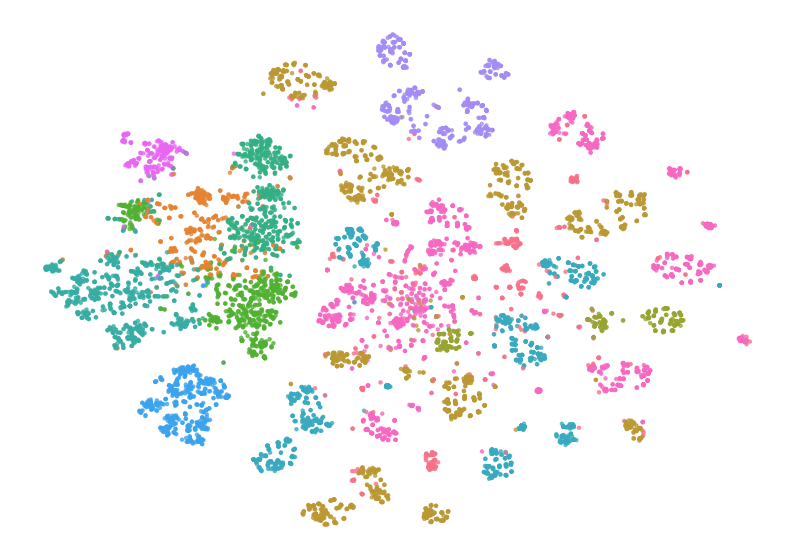

In [73]:
# Step 3: Use a rainbow color palette
palette = sns.color_palette("husl", num_clusters)
colors = [palette[label] for label in kmeans_clusters]

# Step 4: Plot the t-SNE results
plt.figure(figsize=(10, 7))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors, s=5, alpha=0.7)

# Remove axes and titles
plt.axis('off')

# Show the plot
plt.show()